### Ali Darabi - 810100264
### Hesam Ramezanian - 810100248

# Data Science - Assignment 4

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# <span style="color:pink">Warm-Up!</span>

In [2]:
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=['target'])
diabetesDf = pd.concat([data, target], axis=1)


In [3]:
diabetesDf.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [4]:
diabetesDf.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [5]:
diabetesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
missingValues = diabetesDf.isnull().sum()
print("Missing Values:")
print(missingValues)

Missing Values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [7]:
x = diabetesDf.drop('target', axis=1)
y = diabetesDf['target']

scaler = StandardScaler()
xScaled = scaler.fit_transform(x)

xScaledDf = pd.DataFrame(xScaled, columns=x.columns)
diabetesScaledDf = pd.concat([xScaledDf, y], axis=1)

diabetesScaledDf.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0
5,-1.948811,-0.938537,-0.855583,-0.408741,-1.450445,-1.666931,0.867796,-1.606102,-0.865679,-2.025562,97.0
6,-0.956004,1.065488,-0.991541,-0.336359,-0.842963,-0.521390,0.016374,-0.830301,-1.322752,-0.806403,138.0
7,1.335088,1.065488,-0.039834,1.400804,1.905174,2.289794,0.480786,0.372192,-0.752992,0.064426,63.0
8,0.876870,1.065488,1.297088,-0.843032,-0.293335,0.130383,-0.602843,-0.054499,-0.314510,0.238591,110.0
9,-1.490592,-0.938537,0.821235,-0.698268,-0.264408,-0.725481,-0.525441,-0.054499,1.424090,-0.283906,310.0


In [8]:
x = diabetesScaledDf.drop('target', axis=1)
y = diabetesScaledDf['target']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.05, random_state=99)

print("Number of instances in the training dataset:", len(xTrain))
print("Number of instances in the testing dataset:", len(xTest))

Number of instances in the training dataset: 419
Number of instances in the testing dataset: 23


# <span style="color:pink">Main Task</span>

## <span style="color:pink">Part 1: Functions’ Implementation</span>

In [9]:
def meanSquaredError(yTrue, yPred):
    n = len(yTrue)
    mse = sum((yTrue - yPred) ** 2) / n
    return mse

def meanAbsoluteError(yTrue, yPred):
    n = len(yTrue)
    mae = sum(abs(yTrue - yPred)) / n
    return mae

def rootMeanSquaredError(yTrue, yPred):
    mse = meanSquaredError(yTrue, yPred)
    rmse = mse ** 0.5
    return rmse

def r2Score(yTrue, yPred):
    meanTrue = sum(yTrue) / len(yTrue)
    ssTotal = sum((yTrue - meanTrue) ** 2)
    ssResidual = sum((yTrue - yPred) ** 2)
    r2 = 1 - (ssResidual / ssTotal)
    return r2

## <span style="color:pink">Part 2: Building and Training the Linear Regression Model</span>

In [10]:
model = LinearRegression()
model.fit(xTrain, yTrain)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -1.47353934 -12.76561091  23.31525315  16.29689853 -35.91795279
  22.2831563    3.36357294   6.83637808  35.05842623   4.00658758]
Intercept: 152.47004682109633


## <span style="color:pink">Part 3: Model Evaluation</span>

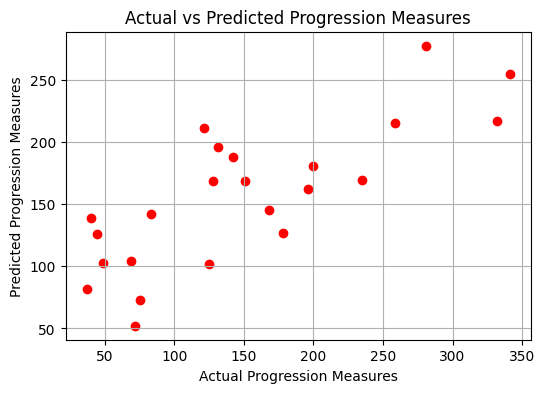

In [11]:
yPred = model.predict(xTest)

plt.figure(figsize=(6, 4))
plt.scatter(yTest, yPred, color='red', alpha=1)
plt.title('Actual vs Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.grid(True)
plt.show()

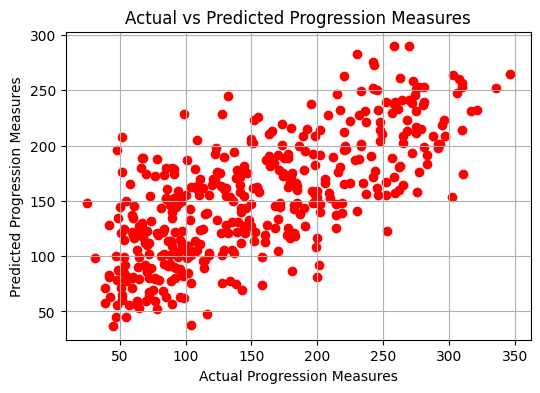

In [12]:
yTrainPred = model.predict(xTrain)

plt.figure(figsize=(6, 4))
plt.scatter(yTrain, yTrainPred, color='red', alpha=1)
plt.title('Actual vs Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.grid(True)
plt.show()

In [13]:
mseTrain = meanSquaredError(yTrain, yTrainPred)
maeTrain = meanAbsoluteError(yTrain, yTrainPred)
rmseTrain = rootMeanSquaredError(yTrain, yTrainPred)
r2ScoreTrain = r2Score(yTrain, yTrainPred)

mseTest = meanSquaredError(yTest, yPred)
maeTest = meanAbsoluteError(yTest, yPred)
rmseTest = rootMeanSquaredError(yTest, yPred)
r2ScoreTest = r2Score(yTest, yPred)

In [14]:
table_data = [
    ['Train Set', mseTrain, maeTrain, rmseTrain, r2ScoreTrain],
    ['Test Set', mseTest, maeTest, rmseTest, r2ScoreTest]
]

headers = ['Data Type/Optimizer', 'MSE', 'MAE', 'RMSE', 'R² Score']

print(tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒═══════════════════════╤═══════════╤═════════╤═════════╤════════════╕
│ Data Type/Optimizer   │       MSE │     MAE │    RMSE │   R² Score │
╞═══════════════════════╪═══════════╪═════════╪═════════╪════════════╡
│ Train Set             │ 2842.9463 │ 42.9559 │ 53.3193 │     0.5114 │
├───────────────────────┼───────────┼─────────┼─────────┼────────────┤
│ Test Set              │ 3260.5854 │ 48.6312 │ 57.1015 │     0.5903 │
╘═══════════════════════╧═══════════╧═════════╧═════════╧════════════╛


## <span style="color:pink">Part 4: Ordinary Least Squares</span>

In [15]:
XTrainWithConst = sm.add_constant(xTrain)

olsModel = sm.OLS(yTrain, XTrainWithConst)
olsResults = olsModel.fit()

print(olsResults.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     42.70
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.87e-57
Time:                        11:18:04   Log-Likelihood:                -2260.6
No. Observations:                 419   AIC:                             4543.
Df Residuals:                     408   BIC:                             4588.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.4700      2.641     57.725      0.0

# <span style="color:pink">Questions</span>

### <span style="color:pink">1. Analyze and evaluate the values in Table (1).</span>

**Mean Squared Error (MSE):**
- The MSE on the training set is 2842, which is lower than the MSE on the test set (3260).
- A lower MSE value is better, as it indicates that the predicted values are closer to the actual values.

**Mean Absolute Error (MAE):**
- The MAE on the training set is 42, which is lower than the MAE on the test set (48).
- A lower MAE value is better, as it represents the average absolute difference between the predicted and actual values.

**Root Mean Squared Error (RMSE):**
- The RMSE on the training set is 53, which is lower than the RMSE on the test set (57).
- The RMSE is the square root of the MSE, and it provides a measure of the typical magnitude of the error.

**R² Score (Coefficient of Determination):**
- The R² score on the training set is 0.5114, which is lower than the R² score on the test set (0.5903).
- The R² score ranges from 0 to 1, with a higher value indicating a better fit of the model to the data.
- An R² score of 0.5114 on the training set suggests that the model explains about 51.14% of the variance in the target variable.
- An R² score of 0.5903 on the test set suggests that the model explains about 59.03% of the variance in the target variable.

**Observations:**
1. The model appears to perform better on the training set than on the test set, as indicated by the lower MSE, MAE, and RMSE values on the training set.
2. However, the R² score is higher on the test set, which is an unexpected observation, as the model is typically expected to perform better on the training set than on the unseen test set. This could be due to the small size of the test set, which may not be representative of the overall data distribution.
3. The R² scores on both the training and test sets are relatively low (below 0.6), suggesting that the model may not be capturing a significant portion of the variance in the target variable.

### <span style="color:pink">2.  Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.</span>

### R² (R-squared):
The R² value obtained in part 4 is 0.511, which indicates that the model explains approximately 51.1% of the variance in the target variable.

### Adjusted R² (Adjusted R-squared):
The Adjusted R² value obtained in part 4 is 0.499. The Adjusted R² is a modified version of the R² that takes into account the number of independent variables in the model and the sample size.It provides a more conservative estimate of the model's explanatory power by penalizing the addition of unnecessary independent variables. The Adjusted R² value is typically lower than the R² value, and it is used to compare the explanatory power of models with different numbers of independent variables. 

### Differences between R² and Adjusted R²:
1. **Adjustment for Number of Independent Variables:** The Adjusted R² takes into account the number of independent variables in the model, while the R² does not. The Adjusted R² penalizes the addition of unnecessary independent variables, which can artificially inflate the R² value.
2. **Model Comparison:** The Adjusted R² is more useful when comparing models with different numbers of independent variables. It allows for a fair comparison of the explanatory power of different models, as it accounts for the impact of adding or removing independent variables.

### Implications of High or Low Values:
- **High R² and Adjusted R² values** (close to 1) indicate that the model fits the data well and explains a significant portion of the variance in the dependent variable. This suggests that the independent variables are relevant and useful for predicting the dependent variable.
- **Low R² and Adjusted R² values** (close to 0) indicate that the model does not fit the data well and fails to explain a substantial portion of the variance in the dependent variable. This may suggest that important independent variables are missing from the model or that the relationships between the variables are not linear.

$$\text{Adjusted R}^2 = 1 - \left[\frac{(1 - \text{R}^2) \times (n - 1)}{n - k - 1}\right]$$

n is the sample size

k is the number of predictors (independent variables) in the model

R^2 is the R-squared score (coefficient of determination)

### <span style="color:pink">3. Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.</span>

The p-values obtained in part 4 indicate the statistical significance of each independent variable (feature) in the model. A lower p-value suggests that the corresponding feature is more likely to be significant in predicting the target variable.

Typically, a p-value less than or equal to 0.05 (5% significance level) is considered statistically significant, meaning that the feature has a significant impact on the target variable. However, the appropriate p-value threshold can vary depending on the specific problem and the desired level of confidence.

1. `age`: p-value = 0.612
   - The p-value is greater than 0.05, indicating that the age feature is not statistically significant in predicting the target variable.

2. `sex`: p-value = 0.000
   - The p-value is less than 0.05, suggesting that the sex feature is statistically significant and has a significant impact on the target variable.

3. `bmi`: p-value = 0.000
   - The p-value is less than 0.05, indicating that the bmi (body mass index) feature is statistically significant in predicting the target variable.

4. `bp`: p-value = 0.000
   - The p-value is less than 0.05, suggesting that the bp (blood pressure) feature is statistically significant and has a significant impact on the target variable.

5. `s1`: p-value = 0.076
   - The p-value is greater than 0.05, indicating that the s1 feature is not statistically significant in predicting the target variable.

6. `s2`: p-value = 0.172
   - The p-value is greater than 0.05, suggesting that the s2 feature is not statistically significant in predicting the target variable.

7. `s3`: p-value = 0.745
   - The p-value is greater than 0.05, indicating that the s3 feature is not statistically significant in predicting the target variable.

8. `s4`: p-value = 0.396
   - The p-value is greater than 0.05, suggesting that the s4 feature is not statistically significant in predicting the target variable.

9. `s5`: p-value = 0.000
   - The p-value is less than 0.05, indicating that the s5 feature is statistically significant in predicting the target variable.

10. `s6`: p-value = 0.217
    - The p-value is greater than 0.05, suggesting that the s6 feature is not statistically significant in predicting the target variable.

Based on the p-values, the columns with suitable values (p-value ≤ 0.05) are `sex`, `bmi`, `bp`, and `s5`. These features are considered statistically significant and have a significant impact on the target variable.

### <span style="color:pink">4. Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.</span>

Based on the OLS regression results, we can assess the importance of each feature in predicting the target variable, which is likely related to an individual's diabetic condition.

1. `sex`: The coefficient for the `sex` feature is -268.3816 with a p-value of 0.000, which is statistically significant. This suggests that the sex of an individual has a significant impact on the target variable, and being male (assuming sex is coded as a binary variable) is associated with a decrease of 268.3816 units in the target variable, on average, compared to females.

2. `bmi`: The coefficient for the `bmi` (body mass index) feature is 490.1751 with a p-value of 0.000, which is statistically significant. This indicates that an increase in BMI is associated with an increase of 490.1751 units in the target variable, on average, suggesting that BMI is an important predictor of the target variable.

3. `bp`: The coefficient for the `bp` (blood pressure) feature is 342.6227 with a p-value of 0.000, which is statistically significant. This suggests that an increase in blood pressure is associated with an increase of 342.6227 units in the target variable, on average, indicating that blood pressure is an important factor in predicting the target variable.

4. `s5`: The coefficient for the `s5` feature is 737.0612 with a p-value of 0.000, which is statistically significant. This implies that an increase in the value of `s5` is associated with an increase of 737.0612 units in the target variable, on average, suggesting that `s5` is an important predictor of the target variable.

5. `age`, `s1`, `s2`, `s3`, `s4`, and `s6`: These features have p-values greater than 0.05, indicating that they are not statistically significant in predicting the target variable based on the current model.

In summary, based on the provided results, the most important features in predicting the target variable (potentially related to an individual's diabetic condition) appear to be `sex`, `bmi`, `bp`, and `s5`. 